In [ ]:
# Imports
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [ ]:
# 1. Add one more hidden layer to autoencoder

# Load MNIST data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Autoencoder
input_img = Input(shape=(784,))

# Transform images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Encode
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Decode
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

history = autoencoder.fit(x_train, x_train,
                           epochs=10,
                           batch_size=256,
                           shuffle=True,
                           validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 7s 21ms/step - loss: 0.6935 - accuracy: 0.0016 - val_loss: 0.6935 - val_accuracy: 0.0010
Epoch 2/10
235/235 [==============================] - 4s 18ms/step - loss: 0.6935 - accuracy: 0.0016 - val_loss: 0.6934 - val_accuracy: 0.0010
Epoch 3/10
235/235 [==============================] - 5s 22ms/step - loss: 0.6934 - accuracy: 0.0016 - val_loss: 0.6934 - val_accuracy: 9.0000e-04
Epoch 4/10
235/235 [==============================] - 4s 18ms/step - loss: 0.6933 - accuracy: 0.0016 - val_loss: 0.6933 - val_accuracy: 9.0000e-04
Epoch 5/10
235/235 [==============================] - 4s 18ms/step - loss: 0.6933 - accuracy: 0.0016 - val_loss: 0.6932 - val_accuracy: 9.0000e-04
Epoch 6/10
235/235 [==============================] - 5s 22ms/step - loss: 0.6932 - accuracy: 0.0016 - val_loss: 0.6932 - val_accuracy: 9.0000e-04
Epoch 7/10
235/235 [==============================] - 4s 18ms/step - loss: 0.6932 - accuracy: 0.0016 - val_loss: 0.6931 - val_

313/313 [==============================] - 1s 2ms/step


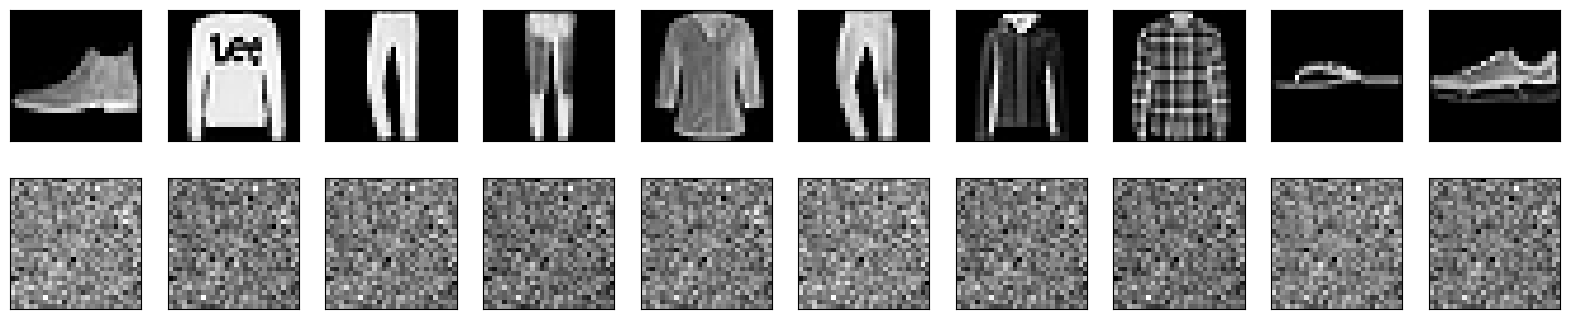

In [ ]:
# 2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data.
# Also, visualize the same test data before reconstruction using Matplotlib

decoded_imgs = autoencoder.predict(x_test)

# original Vs reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

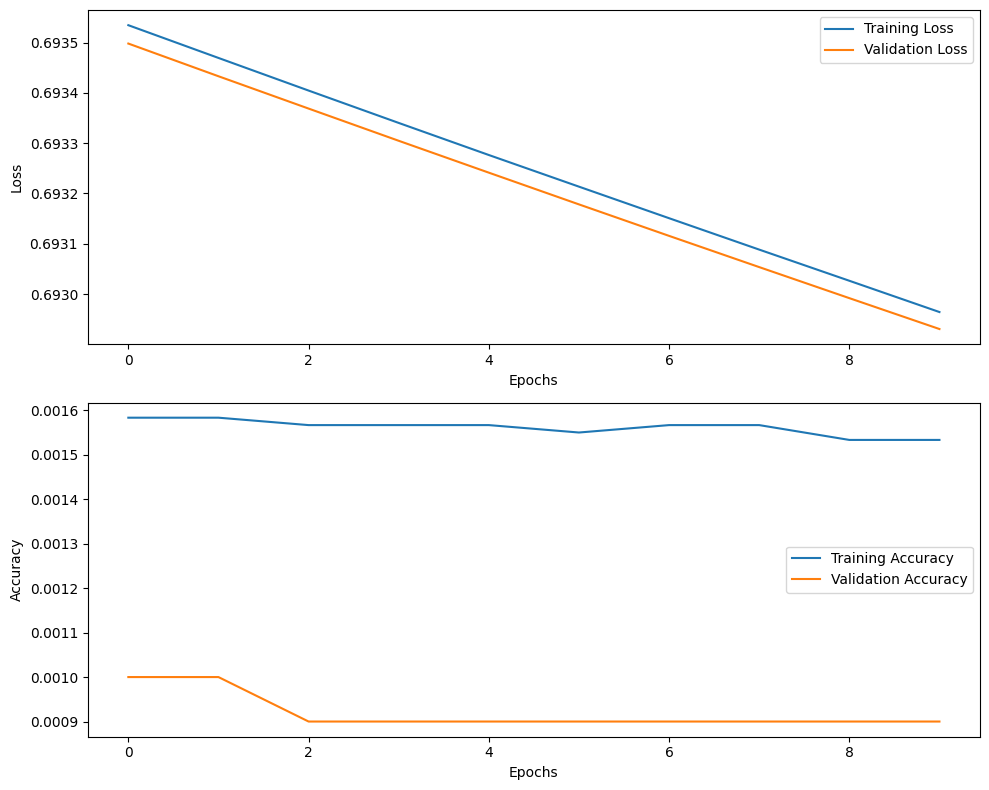

In [ ]:
# 4. Plot loss and accuracy using the history object

# Plot loss and accuracy using subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
# 3. Repeat the question 2 on the denoisening autoencoder

# Load MNIST data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Transform
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introduce noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# AE
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
denoisening_autoencoder = Model(input_img, decoded)
denoisening_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

# Fit
denoisening_history = denoisening_autoencoder.fit(x_train_noisy, x_train,
                                    epochs=10,
                                    batch_size=256,
                                    shuffle=True,
                                    validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
235/235 [==============================] - 7s 25ms/step - loss: 0.6945 - accuracy: 3.5000e-04 - val_loss: 0.6942 - val_accuracy: 0.0052
Epoch 2/10
235/235 [==============================] - 5s 22ms/step - loss: 0.6944 - accuracy: 3.5000e-04 - val_loss: 0.6941 - val_accuracy: 0.0052
Epoch 3/10
235/235 [==============================] - 4s 18ms/step - loss: 0.6943 - accuracy: 3.3333e-04 - val_loss: 0.6940 - val_accuracy: 0.0051
Epoch 4/10
235/235 [==============================] - 5s 19ms/step - loss: 0.6942 - accuracy: 3.3333e-04 - val_loss: 0.6940 - val_accuracy: 0.0050
Epoch 5/10
235/235 [==============================] - 5s 20ms/step - loss: 0.6941 - accuracy: 3.1667e-04 - val_loss: 0.6939 - val_accuracy: 0.0051
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.6940 - accuracy: 3.0000e-04 - val_loss: 0.6938 - val_accuracy: 0.0048
Epoch 7/10
235/235 [==============================] - 5s 21ms/step - loss: 0.6939 - accuracy: 3.6667e-04 - val_loss: 0

313/313 [==============================] - 1s 2ms/step


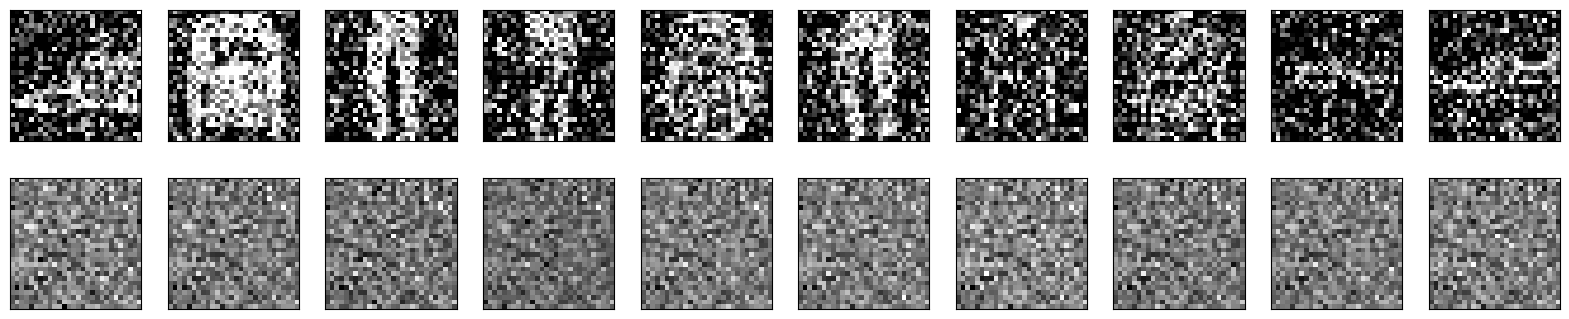

In [ ]:
# Predict
decoded_imgs = denoisening_autoencoder.predict(x_test_noisy)

# Visualize
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

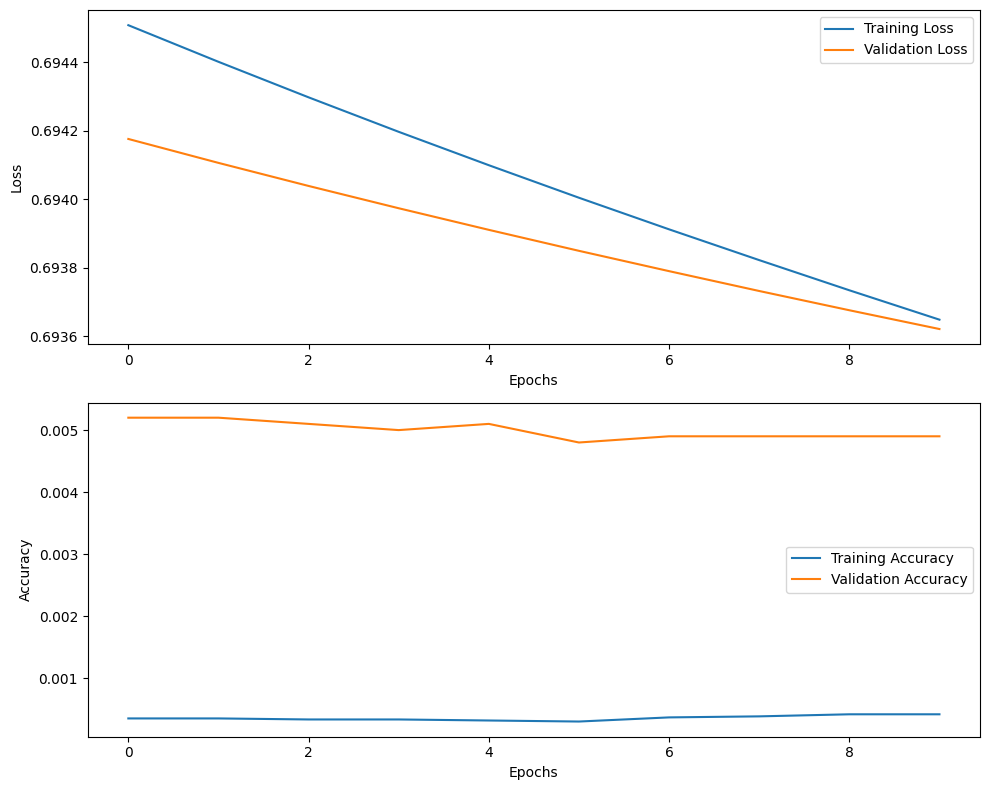

In [ ]:
# 4. Plot loss and accuracy using the history object

# Plot loss and accuracy using subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot loss
ax1.plot(denoisening_history.history['loss'], label='Training Loss')
ax1.plot(denoisening_history.history['val_loss'], label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot accuracy
ax2.plot(denoisening_history.history['accuracy'], label='Training Accuracy')
ax2.plot(denoisening_history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()